In [26]:
from ipywidgets import interact
import ipywidgets
import numpy as np
%matplotlib inline
import pandas as pd
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()
from IPython.display import display, HTML
from bokeh.models.widgets import Panel, Tabs
from bokeh.io import output_file, show
from bokeh.plotting import figure

import warnings
warnings.filterwarnings('ignore')

Loading BokehJS ...

In [27]:
x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

In [28]:
ptre = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5))
r = ptre.line(x, y, color="#2222aa", line_width=3)

In [29]:
def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    elif f == "tan": func = np.tan
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()

In [30]:
_hideS = show(ptre, notebook_handle=True)

In [31]:
_hide = interact(update, f=["sin", "cos", "tan"], w=(0,100), A=(1,5), phi=(0, 20, 0.1))

![alt text](https://am24.akamaized.net/tms/cnt/uploads/2011/11/dundermifflin-550x439.jpg "Hello")
# Semi-Annual Projected Revenue Stream Report
## [Internal Do No Distribute] - Michael Malandro

## Office (US-TV) Season Based Rating Prediction Model


#### 1. Introduction/Problem Statement
#### 2. Data Sets Overview
#### 3. Data Exploration
#### 4. Classification Model
#### 5. Conclusions

 ## 1. Introduction

* Goal: Given the IMDB ratings for the TV show the Office (US), and a script breakdown containing season, episode, scene, speaker, and actual line, accurately predict if that episode will be above or below the mean rating up to the current season. 


* Intent: Create a prototype model which could be expanded to shows still in production to help raise ratings by guiding which episode scripts should be produced. Additionally it could be used by potential advertisers to guide time-slot purchasing decisions

## 2. Data Sets Overview

 * Script Data: Season, Episode, Scene, Speaker, Line, Deleted Scene, line ID
 * IMDB Data: Season, Episode, Rating, Raters, # of episodes (Double Episodes)
 * 2 Double Episodes had IMDB ratings but only one rating tag in Script Data

### Script Data

In [32]:
data = pd.read_csv("the-office-lines - scripts.csv")
data = data[~data.deleted]
data["spoken"] = 1
data.head(15)

,id,season,episode,scene,line_text,speaker,deleted,spoken
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False,1
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False,1
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False,1
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False,1
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False,1
5,6,1,1,2,"[on the phone] Yes, I'd like to speak to your ...",Michael,False,1
6,7,1,1,3,"I've, uh, I've been at Dunder Mifflin for 12 y...",Michael,False,1
7,8,1,1,3,Well. I don't know.,Pam,False,1
8,9,1,1,3,"If you think she's cute now, you should have s...",Michael,False,1
9,10,1,1,3,What?,Pam,False,1


## Rating Data

In [33]:
ratings = pd.read_csv("officeratings.csv", header=None)
ratings = ratings.drop(labels=[6,7,8,9],axis=1).dropna()
ratings.columns = ["season","episode","title","rating","raters","episode_count"]
ratings.head(11)

,season,episode,title,rating,raters,episode_count
0,1.0,1.0,Pilot,7.6,"2,481",1.0
1,1.0,2.0,Diversity Day,8.3,"2,361",1.0
2,1.0,3.0,Health Care,7.9,"1,982",1.0
3,1.0,4.0,The Alliance,8.2,"1,922",1.0
4,1.0,5.0,Basketball,8.4,"2,127",1.0
5,1.0,6.0,Hot Girl,7.8,"1,899",1.0
6,2.0,1.0,The Dundies,8.6,"2,113",1.0
7,2.0,2.0,Sexual Harassment,8.2,"1,789",1.0
8,2.0,3.0,Office Olympics,8.4,"1,812",1.0
9,2.0,4.0,The Fire,8.4,"1,801",1.0


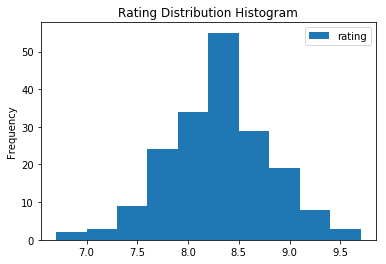

In [34]:
data
ratings
ratings.plot(y="rating",kind="hist", title="Rating Distribution Histogram")

## 3. Data Exploration

## Ratings Distribution

In [35]:
hist, edges = np.histogram(ratings.rating, density=True, bins=10)
f1 = figure(title="Ratings Distribution",
            background_fill_color="#E8DDCB",plot_height=500, plot_width=1000)
r1 = f1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649", legend="Rating Distribution")

f1.legend.location = "top_right"
f1.legend.background_fill_color = "darkgrey"
f1.xaxis.axis_label = 'Rating'
f1.yaxis.axis_label = 'Frequency'
handle_t = show(f1, notebook_handle=True)
def update_hist(Buckets=10):
    hist, edges = np.histogram(ratings.rating, density=True, bins=Buckets)
    r1.data_source.data = {"top": hist,
                          "left": edges[:-1],
                          "right": edges[1:]}
    push_notebook(handle=handle_t)
_hide_t = interact(update_hist, Buckets=(2,51))



## Rating Distribution by Season

In [36]:
from bokeh.charts import BoxPlot


p = BoxPlot(ratings, values='rating', label='season',
            title="Rating Summary (grouped by Season)")
p.legend.location = "bottom_right"
handle_p = show(p, notebook_handle=True)

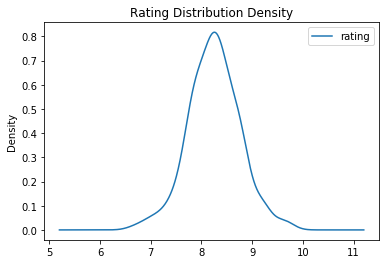

In [37]:
_hide = ratings.plot(y="rating",kind="density", title="Rating Distribution Density")

### Reducing the character space (And aggregating by lines spoken)

In [38]:
df_agg = data.groupby(["season","episode","speaker"]).count()
df_agg = df_agg["spoken"].reset_index()
df_agg = df_agg.sort_values(["season","episode","spoken"],ascending=[True,True,False])
print("Initial Speakers: ",len(df_agg.groupby("speaker")))
#to many speakers, for the Line Count contribution lets strip out anyone in less than 6 epsidoes
episodes = pd.DataFrame(df_agg.groupby("speaker")["episode"].count())
episodes = episodes[episodes["episode"] >= 6]
print("Speakers in more than 6 episodes: ", len(episodes))
episodes = episodes.sort_values("episode").reset_index()
#Lets strip out characters who are more than one character, or doesn't specify an actual person
episodes = episodes[episodes["speaker"].apply(lambda x: x not in ["Everybody", "Everyone", "Both","Crowd","Waiter","Group", "Man", "Woman", "All"])]
print("Speakers who aren't Everybody, Everyone, ect: ", len(episodes))
#Next less remove anyone that didn't speak more than X lines in a single episode.
spoke_x = df_agg[df_agg["spoken"] >= 45].speaker.unique()
episodes = episodes[episodes["speaker"].isin(spoke_x)] 
print("Speakers who have spoken at least 45 lines:", len(episodes))
characters = episodes.speaker.unique()
print(characters)
data1 = df_agg[df_agg["speaker"].isin(characters)].pivot_table(index=["season","episode"], columns="speaker", fill_value=0).reset_index()
data1.head(10)

Initial Speakers:  790
Speakers in more than 6 episodes:  54
Speakers who aren't Everybody, Everyone, ect:  45
Speakers who have spoken at least 45 lines: 15
['Charles' 'Jo' 'Holly' 'David' 'Jan' 'Erin' 'Darryl' 'Toby' 'Michael'
 'Ryan' 'Andy' 'Angela' 'Pam' 'Jim' 'Dwight']


season episode spoken                                                \
speaker                  Andy Angela Charles Darryl David Dwight Erin Holly   
0            1       1      0      1       0      0     0     29    0     0   
1            1       2      0      4       0      0     0     19    0     0   
2            1       3      0      5       0      0     0     62    0     0   
3            1       4      0      7       0      0     0     58    0     0   
4            1       5      0      3       0     15     0     26    0     0   
5            1       6      0      3       0      0     0     28    0     0   
6            2       1      0      3       0      1     0     39    0     0   
7            2       2      0      2       0      9     0     11    0     0   
8            2       3      0      6       0      0     0     58    0     0   
9            2       4      0     17       0      0     0     65    0     0   

                                          
speaker Jan Jim Jo Michael Pam Ryan Toby  
0        12  36  0      81  41    8    0  
1         0  27  0      81  16    4    2  
2        18  42  0      56  32    1    0  
3         0  49  0      79  22    4    4  
4         0  22  0     106  14    8    0  
5         8  55  0     106  45   12    7  
6         9  33  0     106  41    2    0  
7        11  16  0     100  27    1   26  
8         0  56  0      83  35    5    0  
9         0  51  0      69  22   40    0

In [39]:
# Adding classifier target, beat mean up to the last episode of the last season, or the current season for season 1.
ratings["rating_mean"] = ratings.rating.expanding().mean()
rating_means =  [float(ratings[ratings["season"] == x+1][-1:]["rating_mean"]) for x in range(len(ratings.groupby("season")))]
for i in range(len(ratings.groupby("season"))+1):
    ratings.loc[ratings["season"]==i,"using_mean"] = rating_means[i-2] if ((i-2) >= 0) else rating_means[0]
ratings["beat_mean"] =  ratings.apply(lambda x: 1 if x["rating"] > x["using_mean"] else 0, axis = 1) 
print(rating_means)
ratings.head(10)

[8.033333333333333, 8.328571428571431, 8.427450980392159, 8.46615384615385, 8.473626373626375, 8.407826086956526, 8.38920863309353, 8.287730061349695, 8.248924731182795]


,season,episode,title,rating,raters,episode_count,rating_mean,using_mean,beat_mean
0,1.0,1.0,Pilot,7.6,"2,481",1.0,7.600000,8.033333,0
1,1.0,2.0,Diversity Day,8.3,"2,361",1.0,7.950000,8.033333,1
2,1.0,3.0,Health Care,7.9,"1,982",1.0,7.933333,8.033333,0
3,1.0,4.0,The Alliance,8.2,"1,922",1.0,8.000000,8.033333,1
4,1.0,5.0,Basketball,8.4,"2,127",1.0,8.080000,8.033333,1
5,1.0,6.0,Hot Girl,7.8,"1,899",1.0,8.033333,8.033333,0
6,2.0,1.0,The Dundies,8.6,"2,113",1.0,8.114286,8.033333,1
7,2.0,2.0,Sexual Harassment,8.2,"1,789",1.0,8.125000,8.033333,1
8,2.0,3.0,Office Olympics,8.4,"1,812",1.0,8.155556,8.033333,1
9,2.0,4.0,The Fire,8.4,"1,801",1.0,8.180000,8.033333,1


### Lines Spoken Distribution

In [40]:
hist, edges = np.histogram(df_agg[df_agg["speaker"] == "Michael"].spoken, density=True, bins=10)
f2 = figure(title="Line Distribution",
            background_fill_color="#E8DDCB",plot_height=500, plot_width=1000)
r2 = f2.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649", legend="Rating Distribution")

f2.legend.location = "top_right"
f2.legend.background_fill_color = "darkgrey"
f2.xaxis.axis_label = 'Lines Spoken'
f2.yaxis.axis_label = 'Frequency'
handle_ct = show(f2, notebook_handle=True)
def update_character_hist(Buckets=10,Character="Michael"):
    hist, edges = np.histogram(df_agg[df_agg["speaker"] == Character].spoken, density=True, bins=Buckets)
    r2.data_source.data = {"top": hist,
                          "left": edges[:-1],
                          "right": edges[1:]}
    f2.xaxis.axis_label = "Lines Spoken({})".format(Character)
    push_notebook(handle=handle_ct)
_hide_ct = interact(update_character_hist, Buckets=(2,51),Character=list(characters))

### Lines Spoken Distribution & Impact

In [41]:
df_agg["beat_mean"] = df_agg[["season","episode"]].apply(lambda x: float(ratings[(ratings["season"] == float(x["season"])) & (ratings["episode"] == float(x["episode"])  )].head(1)["beat_mean"] ), axis = 1)
pp = BoxPlot(df_agg[df_agg["speaker"].isin(characters)], values='spoken', label='speaker',
            title="Lines Spoken (grouped by Speaker)")
pp.legend.location = "top_right"

pp_high = BoxPlot(df_agg[df_agg["speaker"].isin(characters) & (df_agg.beat_mean == 1)], values='spoken', label='speaker',
            title="Lines Spoken (grouped by Speaker)")
pp_high.legend.location = "top_right"

pp_low = BoxPlot(df_agg[df_agg["speaker"].isin(characters) & (df_agg.beat_mean != 1)], values='spoken', label='speaker',
            title="Lines Spoken (grouped by Speaker)")
pp_low.legend.location = "top_right"

tab1 = Panel(child=pp, title="All")
tab2 = Panel(child=pp_high, title="Highly Rated")
tab3 = Panel(child=pp_low, title="Lowly Rated")

tabs = Tabs(tabs=[ tab1, tab2, tab3 ])

handle_pp = show(tabs, notebook_handle=True)


### Reducing the scene composition space


In [42]:
scenes = data[data["speaker"].isin(characters)].groupby(["season","episode","scene","speaker"])["spoken"]
scenes = pd.DataFrame(scenes.count()).reset_index()
scenes.describe().head(25)
scenes["_speakers"] = scenes.groupby(["season","episode", "scene"])["speaker"].transform(lambda x: ",".join(sorted(x)))
print("Total Scenes", len(scenes))
scenes2 = pd.DataFrame(scenes.groupby(["season", "episode", "scene","_speakers"])["spoken"].sum()).reset_index()
scenes2.head(10)
df_agg2 = scenes2.groupby(["season","episode","_speakers"]).count()
df_agg2 = df_agg2["spoken"].reset_index()
df_agg2 = df_agg2.sort_values(["season","episode","spoken"],ascending=[True,True,False])
print("Number of Combined speakers:", len(df_agg2._speakers.unique()))
df_agg2_vc = pd.DataFrame(df_agg2._speakers.value_counts())
# print([(x, len(df_agg2_vc[df_agg2_vc._speakers > x])) for x in range(100)])
comp_chars = df_agg2_vc[df_agg2_vc._speakers > 20].index
print("Final Scene Compositions,  minimum of 20 scenes", list(comp_chars))
data2 = df_agg2[df_agg2["_speakers"].isin(comp_chars)].pivot_table(index=["season","episode"], columns="_speakers", fill_value=0).reset_index()
data2.head()

Total Scenes 14088
Number of Combined speakers: 451
Final Scene Compositions,  minimum of 20 scenes ['Dwight', 'Jim', 'Pam', 'Michael', 'Jim,Pam', 'Andy', 'Dwight,Michael', 'Dwight,Jim', 'Angela', 'Michael,Pam', 'Ryan', 'Jim,Michael', 'Erin', 'Toby', 'Angela,Dwight', 'Dwight,Jim,Pam', 'Darryl', 'Jim,Michael,Pam', 'Andy,Erin', 'Dwight,Pam', 'Andy,Jim', 'Dwight,Jim,Michael', 'Andy,Dwight', 'Jan,Michael', 'Michael,Ryan', 'Michael,Toby', 'Angela,Pam', 'Dwight,Jim,Michael,Pam', 'Dwight,Michael,Pam', 'Andy,Jim,Pam', 'Andy,Michael', 'Angela,Michael', 'Erin,Michael', 'Andy,Angela', 'Darryl,Michael', 'Andy,Dwight,Jim', 'Andy,Darryl']


season episode spoken                                      \
_speakers                  Andy Andy,Angela Andy,Darryl Andy,Dwight   
0              1       1      0           0           0           0   
1              1       2      0           0           0           0   
2              1       3      0           0           0           0   
3              1       4      0           0           0           0   
4              1       5      0           0           0           0   

                                                          ...               \
_speakers Andy,Dwight,Jim Andy,Erin Andy,Jim Andy,Jim,Pam ...  Jim,Michael   
0                       0         0        0            0 ...            1   
1                       0         0        0            0 ...            3   
2                       0         0        0            0 ...            1   
3                       0         0        0            0 ...            1   
4                       0         0        0            0 ...            2   

                                                                    \
_speakers Jim,Michael,Pam Jim,Pam Michael Michael,Pam Michael,Ryan   
0                       0       4       7           2            0   
1                       1       2      15           0            0   
2                       1       2       9           3            0   
3                       0       1      10           1            1   
4                       1       2      14           0            0   

                                      
_speakers Michael,Toby Pam Ryan Toby  
0                    0   3    1    0  
1                    1   2    0    0  
2                    0   0    0    0  
3                    0   1    0    0  
4                    0   2    0    0  

[5 rows x 39 columns]

### Scene Spoken Distribution

In [43]:
hist, edges = np.histogram(df_agg2[df_agg2["_speakers"] == "Michael"].spoken, density=True, bins=10)
f3 = figure(title="Scene Distribution",
            background_fill_color="#E8DDCB",plot_height=500, plot_width=1000)
r3 = f3.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649", legend="Scene Distribution")

f3.legend.location = "top_right"
f3.legend.background_fill_color = "darkgrey"
f3.xaxis.axis_label = 'Scenes Together'
f3.yaxis.axis_label = 'Frequency'
handle_cct = show(f3, notebook_handle=True)
def update_scene_hist(Buckets=10,Composition="Michael"):
    hist, edges = np.histogram(df_agg2[df_agg2["_speakers"] == Composition].spoken, density=True, bins=Buckets)
    r3.data_source.data = {"top": hist,
                          "left": edges[:-1],
                          "right": edges[1:]}
    f3.xaxis.axis_label = "Scene Composition({})".format(Composition)
    push_notebook(handle=handle_cct)
_hide_cct = interact(update_scene_hist, Buckets=(2,51),Composition=list(sorted(comp_chars)))

### Scene Composition Distribution & Impact

In [44]:
df_agg2["beat_mean"] = df_agg2[["season","episode"]].apply(lambda x: float(ratings[(ratings["season"] == float(x["season"])) & (ratings["episode"] == float(x["episode"])  )].head(1)["beat_mean"] ), axis = 1)
pp = BoxPlot(df_agg2[df_agg2["_speakers"].isin(comp_chars)], values='spoken', label='_speakers',
            title="Scenes Appeared in (grouped by Composition)")
pp.legend.visible = False

pp_high = BoxPlot(df_agg2[df_agg2["_speakers"].isin(comp_chars) & (df_agg2.beat_mean == 1)], values='spoken', label='_speakers',
            title="Scenes Appeared in (grouped by Composition)")
pp_high.legend.visible = False

pp_low = BoxPlot(df_agg2[df_agg2["_speakers"].isin(comp_chars) & (df_agg2.beat_mean != 1)], values='spoken', label='_speakers',
            title="Scenes Appeared in (grouped by Composition)")
pp_low.legend.visible = False

tab1 = Panel(child=pp, title="All")
tab2 = Panel(child=pp_high, title="Highly Rated")
tab3 = Panel(child=pp_low, title="Lowly Rated")

tabs = Tabs(tabs=[ tab1, tab2, tab3 ])

handle_ppp = show(tabs, notebook_handle=True)

## 4. Classification Model

In [45]:
df_agg2.head(30)

,season,episode,_speakers,spoken,beat_mean
14,1,1,Michael,7,0.0
13,1,1,"Jim,Pam",4,0.0
1,1,1,Dwight,3,0.0
11,1,1,Jim,3,0.0
17,1,1,Pam,3,0.0
6,1,1,"Dwight,Michael,Pam",2,0.0
15,1,1,"Michael,Pam",2,0.0
16,1,1,"Michael,Pam,Ryan",2,0.0
0,1,1,Angela,1,0.0
2,1,1,"Dwight,Jim",1,0.0


In [46]:
data1_temp1 = data1[:]
data1_temp1.columns = ["season", "episode"] + list(data1_temp1.columns.get_level_values(1)[2:])
data1_temp = data1_temp1.drop(["season", "episode"],axis=1)

data2_temp1 = data2[:]
data2_temp1.columns = ["season", "episode"] + ["comp_" + x for x in data2_temp1.columns.get_level_values(1)[2:]]
data2_temp = data2_temp1.drop(["season","episode"], axis=1)

analysis_data = ratings.join([data1_temp, data2_temp])
analysis_data.raters = analysis_data.raters.apply(lambda x: float(x.replace(",","")))

analysis_data["lines_spoken"] = data.groupby(["season","episode"])["spoken"].count().reset_index()["spoken"]
analysis_data["scene_count"] = data.groupby(["season","episode"])["scene"].max().reset_index()["scene"]

monologues = df_agg2[df_agg2["_speakers"].apply(lambda x: "," not in x)]
shared_scene = df_agg2[df_agg2["_speakers"].apply(lambda x: "," in x)]
analysis_data["monologues"] = monologues.groupby(["season", "episode"])["spoken"].sum().reset_index()["spoken"]
analysis_data["shared_scene"] = shared_scene.groupby(["season", "episode"])["spoken"].sum().reset_index()["spoken"]
analysis_data["mss_ratio"] = analysis_data["monologues"] / analysis_data["shared_scene"]
del analysis_data["using_mean"]
del analysis_data["rating_mean"]

In [ ]:
analysis_data.head()

,season,episode,title,rating,raters,episode_count,beat_mean,Andy,Angela,Charles,...,"comp_Michael,Ryan","comp_Michael,Toby",comp_Pam,comp_Ryan,comp_Toby,lines_spoken,scene_count,monologues,shared_scene,mss_ratio
0,1.0,1.0,Pilot,7.6,2481.0,1.0,0,0,1,0,...,0,0,3,1,0,229,39,19,18,1.055556
1,1.0,2.0,Diversity Day,8.3,2361.0,1.0,1,0,4,0,...,0,1,2,0,0,217,46,21,14,1.500000
2,1.0,3.0,Health Care,7.9,1982.0,1.0,0,0,5,0,...,0,0,0,0,0,244,39,19,18,1.055556
3,1.0,4.0,The Alliance,8.2,1922.0,1.0,1,0,7,0,...,1,0,1,0,0,265,56,21,28,0.750000
4,1.0,5.0,Basketball,8.4,2127.0,1.0,1,0,3,0,...,0,0,2,0,0,235,50,19,21,0.904762


### Random Forest Results

In [ ]:
results = []
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score
drop_cols = ["title", "rating","shared_scene","raters", "beat_mean"]
clf = RandomForestClassifier(n_estimators=200, warm_start=False, min_samples_split=2)

tab_contents = ["Season {}".format(x) for x in range(2,10)] + ["All"]
children = [ipywidgets.Output(description=name) for name in tab_contents]
tab = ipywidgets.Tab()
tab.children = children
for i in range(len(children)):
    tab.set_title(i, tab_contents[i])
display(tab)

for i in range(2,10):
    with children[i-2]:
        X = analysis_data.drop(drop_cols, axis=1)[analysis_data["season"] < i]
        y = analysis_data[analysis_data["season"] < i]["beat_mean"]
        clf.fit(X,y)
        try:
            scores = cross_val_score(clf, X, y, scoring='roc_auc', cv=5 if i > 5 else 4)
            print("ROC_AUC", scores)
            print("Mean AUC", scores.mean())
        except:
            pass
        feature_importance = pd.DataFrame([x for x in zip(clf.feature_importances_, X.columns)])
        feature_importance.columns = ["importance","feature"]
        feature_importance = feature_importance.sort_values(["importance"], ascending=False)
        display(feature_importance.head(5))
        temp_results = clf.predict(analysis_data.drop(drop_cols, axis=1)[analysis_data["season"] == i])
        display(pd.crosstab(analysis_data[analysis_data["season"] ==i].beat_mean, temp_results,rownames=['Actually Beats Mean'], colnames=['Predicted Beats Mean']))
        results += list(temp_results)
        print("Accuracy: ", accuracy_score(analysis_data[analysis_data["season"] ==i].beat_mean, temp_results))
    
with children[-1]:
    result_data = pd.DataFrame(analysis_data[analysis_data["season"] > 1].beat_mean)
    result_data["predict"] = results
    result_data["correct"] = result_data.predict == result_data.beat_mean
    print("Overall Accuracy:",result_data["correct"].mean())
    #print("Overall Accuracy:", accuracy_score(result_data.beat_mean,result_data.predict))
    # They are the same. Awesome!
    pz = figure(plot_width=400, plot_height=400)

    # add a line renderer
    pz.line([int(x) for x in result_data.index[1:]], [float(x) for x in result_data.correct.expanding().mean()], line_width=2)
    show(pz, notebook_handle=True)
    #display(result_data.correct.expanding().mean().plot.figure())

### Final Model State

In [ ]:
from sklearn.model_selection import train_test_split
tts_result_list = []
    
    
tab_contents_2 = ["Scores"] + ["Sample {}".format(x) for x in range(10)]
children2 = [ipywidgets.Output(description=name) for name in tab_contents_2]
tab2 = ipywidgets.Accordion()
tab2.children = children2
for i in range(len(children2)):
    tab2.set_title(i, tab_contents_2[i])
display(tab2)

for i in range(10):
    with children2[i+1]:
        X = analysis_data.drop(drop_cols, axis=1)
        y = analysis_data["beat_mean"]
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=0)
        clf.fit(X_train, y_train)
        tts_results = list(clf.predict(X_test))
        tts_result_data = pd.DataFrame(y_test)
        tts_result_data["predict"] = tts_results
        tts_result_data["correct"] = tts_result_data.predict == tts_result_data.beat_mean
        tts_result_list.append(tts_result_data["correct"].mean())
        scores = cross_val_score(clf, X_test, y_test, scoring='roc_auc', cv=5)
        print(scores)
        print(scores.mean())
        feature_importance = pd.DataFrame([x for x in zip(clf.feature_importances_, X.columns)])
        feature_importance.columns = ["importance","feature"]
        feature_importance = feature_importance.sort_values(["importance"], ascending=False)
        display (feature_importance.head(5))
        display (pd.crosstab(y_test, tts_result_data["predict"], rownames=['Actually Beats Mean'], colnames=['Predicted Beats Mean']))
with children2[0]:
    display(tts_result_list)

## 5. Conclusions

* Even the datasets you expect to be able to perfectly align might not
* Investigating what components are important earlier would have saved me time (Raters ;( )
* Going narrower helps drive decisions, IE season based vs everything

* Rating is as of today, which could be skewed from capturing it lagged after air date



In [ ]:
// .... I wonder if the actual words are important ?
// Can I normalize the line data to do a linear approach? & Handle correlation of features
// What would it look like if I didn't categorize it by above/below mean and use actual rating?


In [ ]:
dir(clf)